In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.express as px

## Observation Data set 
the observations from the national parks are glanced at <br><br>
**data columns in the observation dataset:**
- scientific name
- national park name
- number of observed specie

In [15]:
observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Species Data Set
the species data from the national parks are glanced at.<br><br>
**data columns in the species dataset**:
- category
- scientific name
- common name
- conservation status


In [16]:
species['conservation_status'].fillna('No Intervention', inplace=True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [17]:
#print (observation.dtypes)
#print (observation.isnull().sum())
#print (observation.park_name.unique())
#print (observation.scientific_name.unique)
print (observation.duplicated().sum() , ', number of duplicated values in observation data')
observation_2 = observation.drop_duplicates()
print (observation_2.shape , ' dimensions of the observation dataset')
print (observation_2.scientific_name.nunique() , ' unique values of the dataframe')

15 , number of duplicated values in observation data
(23281, 3)  dimensions of the observation dataset
5541  unique values of the dataframe


## Observations in National Parks
number of observations in each national park is compared
<br><br>
**yellowstone national park** with nearly 1,5 million observed species is the most biodiverse<br><br>
**great smoky mountains national park** with nearly 400 thousand species is the least biodiverse

                             park_name  observations
2            Yellowstone National Park       1442314
3               Yosemite National Park        862836
0                  Bryce National Park        575901
1  Great Smoky Mountains National Park        431378


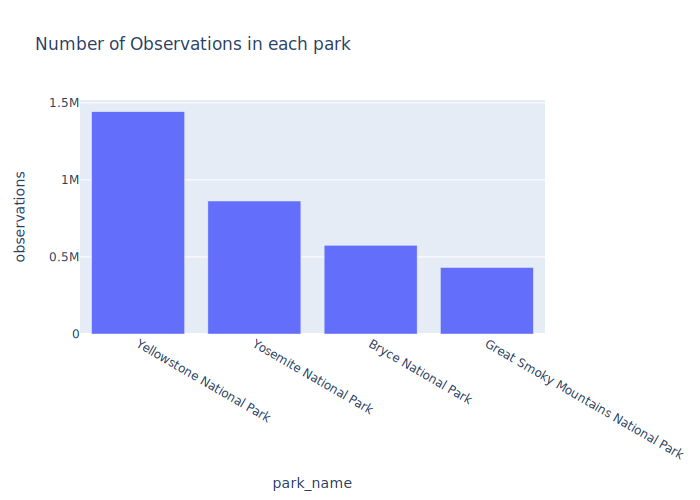

In [18]:
#print (observation_2.head())
obervations_parks = observation_2.groupby('park_name').sum(numeric_only=True).reset_index().sort_values(by='observations', ascending=False)
print (obervations_parks)
# sns.catplot(data=obervations_parks , kind = 'bar' , x = 'park_name' , y ='observations')
# plt.xticks(rotation=90)
# plt.title('Number of Observations in each park')

fig = px.bar(obervations_parks, x = 'park_name' , y = 'observations', title = 'Number of Observations in each park')
fig.show(renderer="svg")

## Most and Least Observed Species
- species with the highest and lowest number of observations combined in all parks

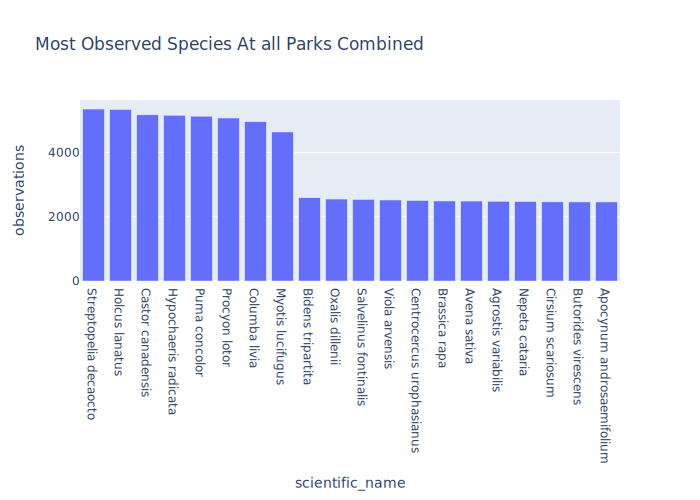

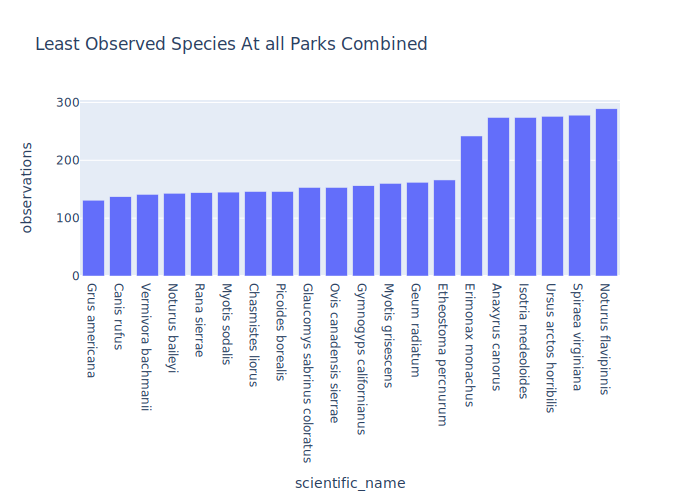

In [19]:
merged_species = pd.merge(observation, species, on='scientific_name')
#merged_species['total_specie_count'] = merged_species.groupby('scientific_name')['observations'].transform('sum')
merged_species_agg_most = merged_species.groupby('scientific_name')['observations'].agg('sum').reset_index().sort_values(by= 'observations', ascending=False)
merged_species_agg_least = merged_species.groupby('scientific_name')['observations'].agg('sum').reset_index().sort_values(by= 'observations', ascending=True)

fig2 = px.bar(merged_species_agg_most.head(20), x = 'scientific_name' , y = 'observations', title = 'Most Observed Species At all Parks Combined')
fig2.show(renderer="svg")

fig3 = px.bar(merged_species_agg_least.head(20), x = 'scientific_name' , y = 'observations', title = 'Least Observed Species At all Parks Combined')
fig3.show(renderer="svg")

## Specie Observation in each National Park
- least and most observed species in each national park is visualized

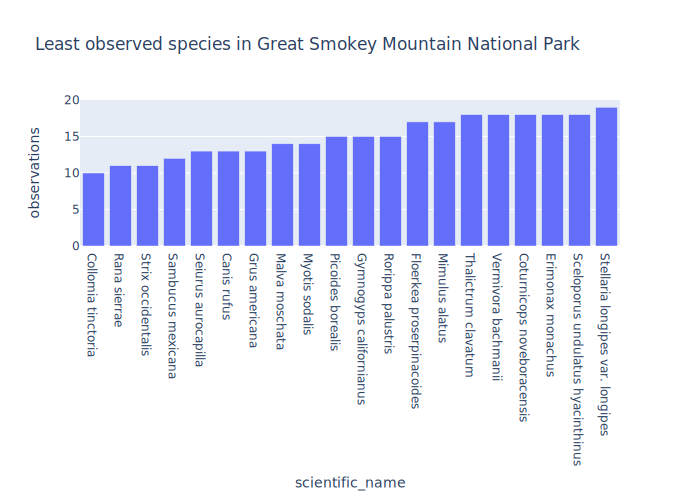

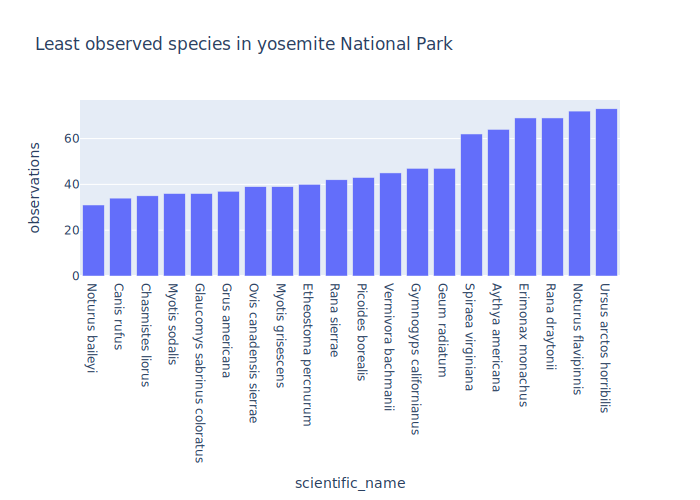

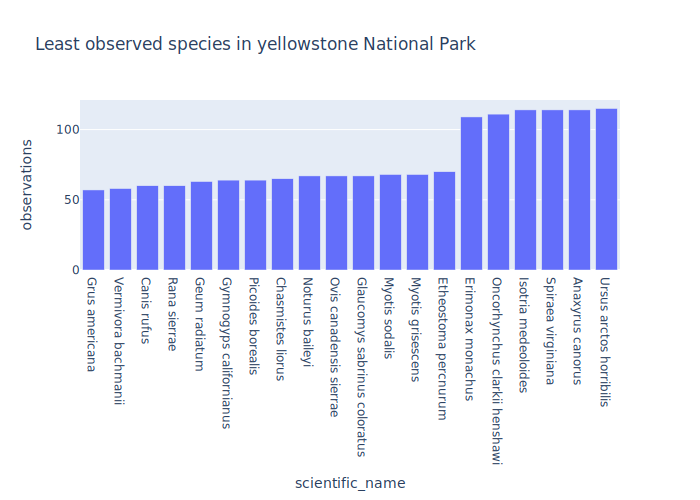

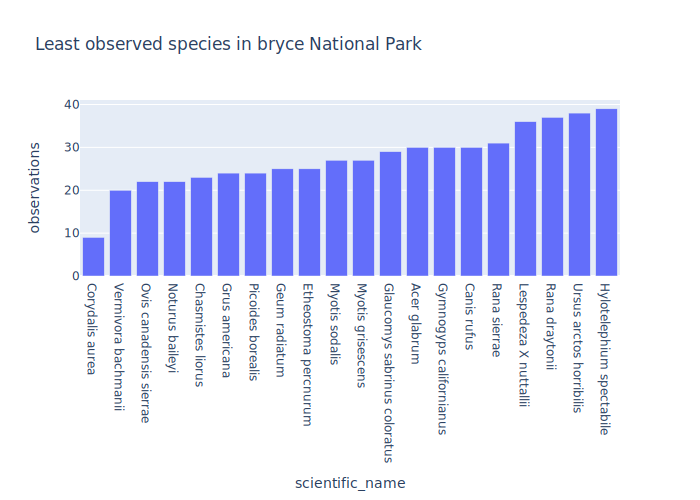

In [20]:
smoky_mountains = observation_2.loc[observation_2.park_name == 'Great Smoky Mountains National Park']
smoky_mountains_combined = smoky_mountains.groupby('scientific_name', as_index=False)['observations'].sum()
yosemite = observation_2.loc[observation_2.park_name == 'Yosemite National Park']
yosemite_combined = yosemite.groupby('scientific_name', as_index=False)['observations'].sum()
yellowstone = observation_2.loc[observation_2.park_name == 'Yellowstone National Park']
yellowstone_combined = yellowstone.groupby('scientific_name', as_index=False)['observations'].sum()
bryce = observation_2.loc[observation_2.park_name == 'Bryce National Park']
bryce_combined = bryce.groupby('scientific_name', as_index=False)['observations'].sum()

smoky_mountains_endangered = smoky_mountains_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations',title="Least observed species in Great Smokey Mountain National Park")
fig.show(renderer="svg")

yosemite_endangered = yosemite_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(yosemite_endangered, x = 'scientific_name' , y = 'observations', title="Least observed species in yosemite National Park")
fig.show(renderer="svg")


yellowstone_endangered = yellowstone_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(yellowstone_endangered, x = 'scientific_name' , y = 'observations', title = 'Least observed species in yellowstone National Park')
fig.show(renderer="svg")


bryce_endangered = bryce_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(bryce_endangered, x = 'scientific_name' , y = 'observations', title = 'Least observed species in bryce National Park')
fig.show(renderer="svg")


## Most Observed Species
- species with highest number of observations are listed for each national park

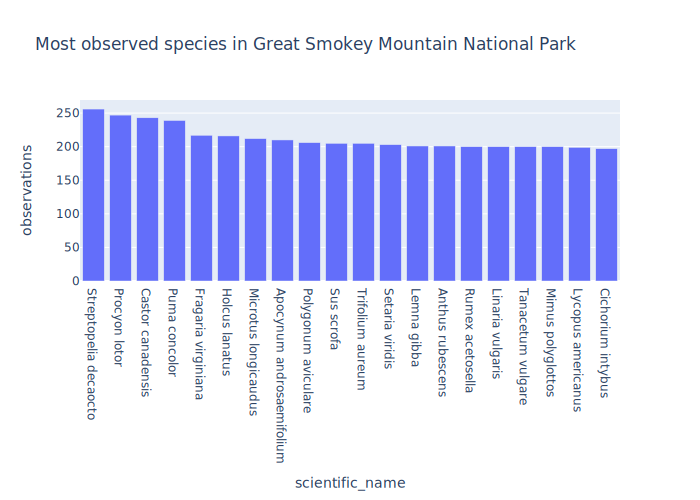

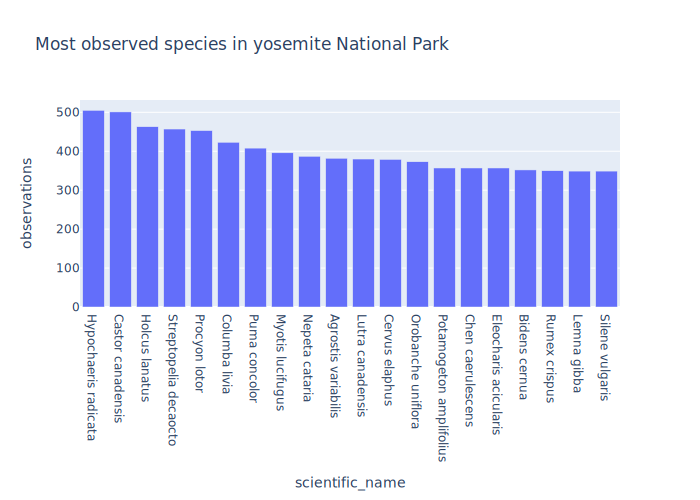

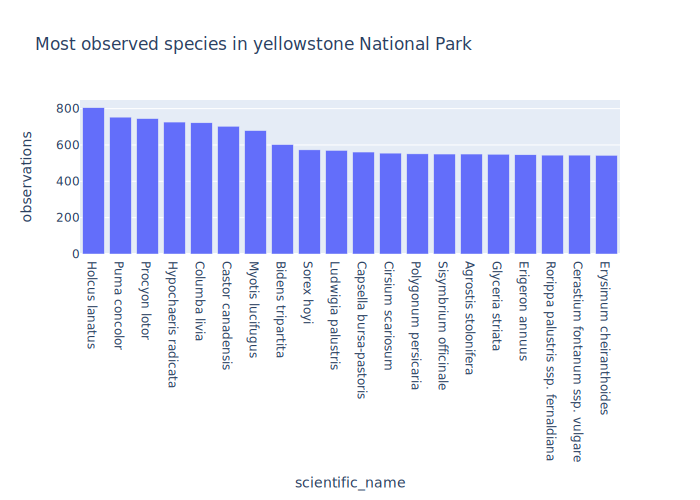

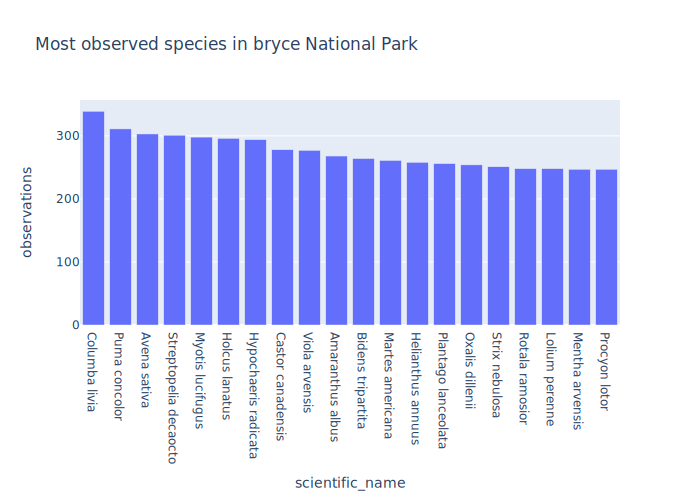

In [21]:
import plotly.express as px


smoky_mountains_endangered = smoky_mountains_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations',title="Most observed species in Great Smokey Mountain National Park")
fig.show(renderer="svg")



yosemite_endangered = yosemite_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(yosemite_endangered, x = 'scientific_name' , y = 'observations', title="Most observed species in yosemite National Park")
fig.show(renderer="svg")


yellowstone_endangered = yellowstone_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(yellowstone_endangered, x = 'scientific_name' , y = 'observations', title = 'Most observed species in yellowstone National Park')
fig.show(renderer="svg")


bryce_endangered = bryce_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(bryce_endangered, x = 'scientific_name' , y = 'observations', title = 'Most observed species in bryce National Park')
fig.show(renderer="svg")


## Species in each Taxonomical Group
- number of species in each taxonomical group is displayed and visualized
- duplicated values are dropped

    category             count
--  -----------------  -------
 6  Vascular Plant        4470
 1  Bird                   521
 4  Nonvascular Plant      333
 3  Mammal                 214
 2  Fish                   127
 0  Amphibian               80
 5  Reptile                 79


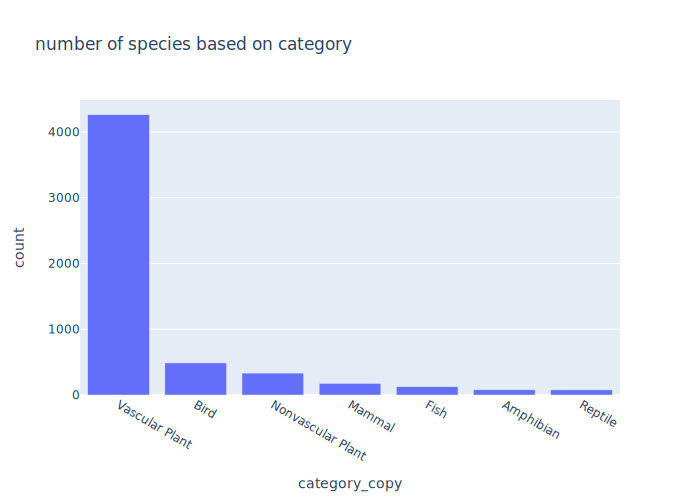

In [22]:
from tabulate import tabulate

grouped_species = species.groupby('category').size().reset_index(name='count')
grouped_species = grouped_species.sort_values(by='count' , ascending=False)
print(tabulate(grouped_species, headers='keys', tablefmt='simple'))

species = species.drop_duplicates('scientific_name')
species['category_copy'] = species['category']
category_numbered = species.groupby('category_copy').size().reset_index(name='count')
category_numbered_sorted = category_numbered.sort_values(by='count', ascending=False)


fig = px.bar(category_numbered_sorted, x = 'category_copy' , y = 'count',title="number of species based on category")
fig.show(renderer="svg")

## Conservation Status

- number of all species based on their conservation status is visualized

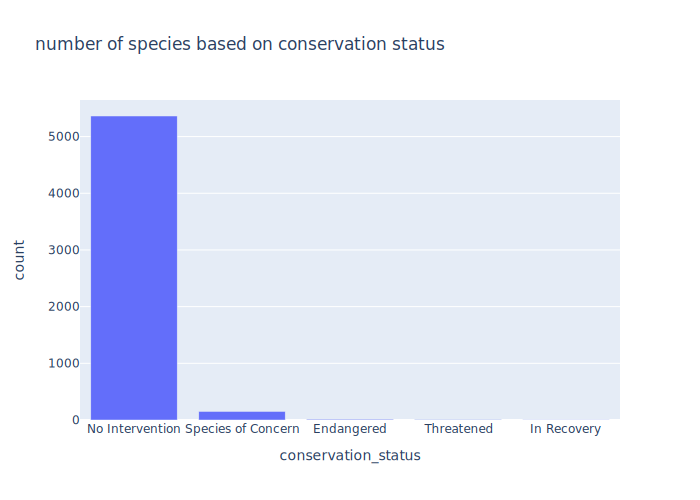

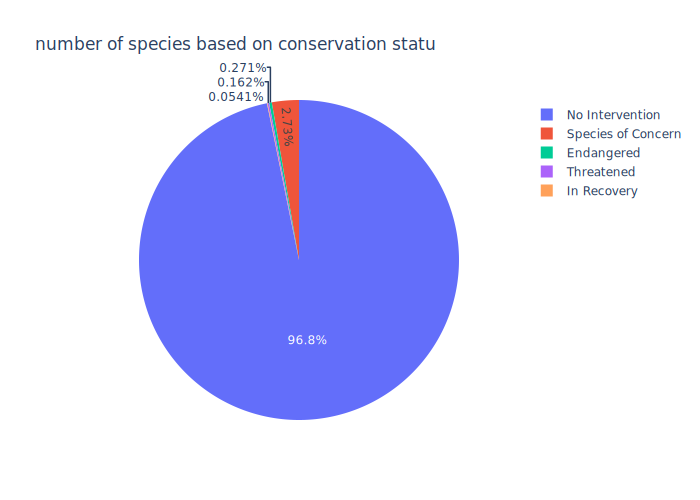

In [23]:
conserved = species[species.conservation_status.isnull() == False]
conserved_numbered = conserved.groupby('conservation_status').size().reset_index(name='count')
conserved_numbered_sorted = conserved_numbered.sort_values(by='count', ascending=False)
conserved_numbered_sorted_filtered = conserved_numbered_sorted[conserved_numbered_sorted['conservation_status'] != 'No Intervention']


conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

fig = px.bar(conserved_numbered_sorted, x = 'conservation_status' , y = 'count', title="number of species based on conservation status")
fig.show(renderer="svg")
fig3 = px.pie(conserved_numbered_sorted, values='count', names='conservation_status', title='number of species based on conservation statu')
fig3.show(renderer="svg")

## Species with Intervention
- all conservation status are grouped based on their respective species 
- bar chart and pie chart is displayed in order to compare the number of species with intervention
- types of intervention as displayed are :
    - endangered
    - in recovery
    - species of concern
    - threatened


 conservation_status      Amphibian    Bird    Fish    Mammal    Nonvascular Plant    Reptile    Vascular Plant
---------------------  -----------  ------  ------  --------  -------------------  ---------  ----------------
Endangered                       1       4       3         6                    0          0                 1
In Recovery                      0       3       0         0                    0          0                 0
Species of Concern               4      68       4        22                    5          5                43
Threatened                       2       0       3         2                    0          0                 2




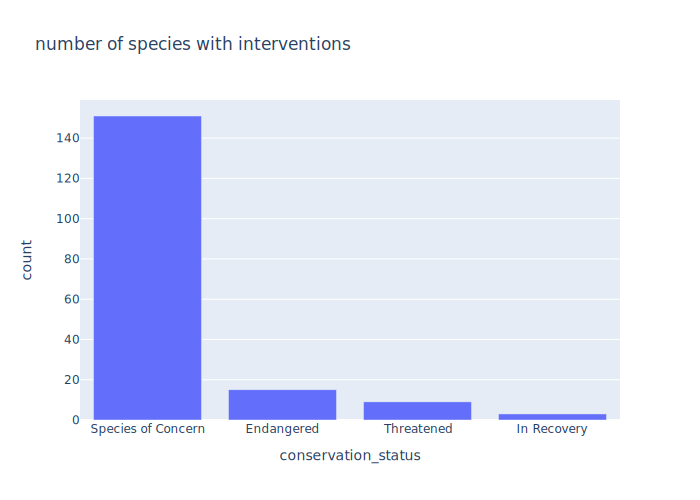

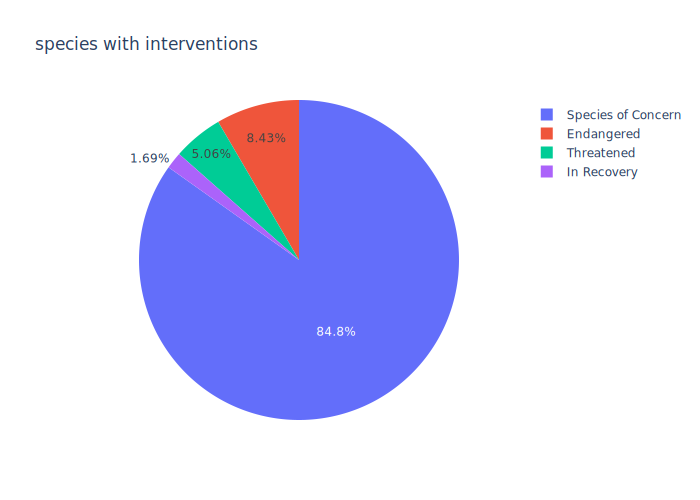

In [24]:
conservationCategory = conservationCategory.fillna(0)
print('\n', tabulate(conservationCategory, headers='keys', tablefmt='simple'))
print ("\n")
fig2 = px.bar(conserved_numbered_sorted_filtered, x = 'conservation_status' , y = 'count', title="number of species with interventions")
fig2.show(renderer="svg")
fig4 = px.pie(conserved_numbered_sorted_filtered, values='count', names='conservation_status', title='species with interventions')
fig4.show(renderer="svg")

## Species of Concern
- species of concern are categorized in table and shown in pie and bar chart
- types of species of concern are:
    - bird
    - vascular plant
    - mammal
    - non vascular plant
    - reptile
    - amphibian
    - fish

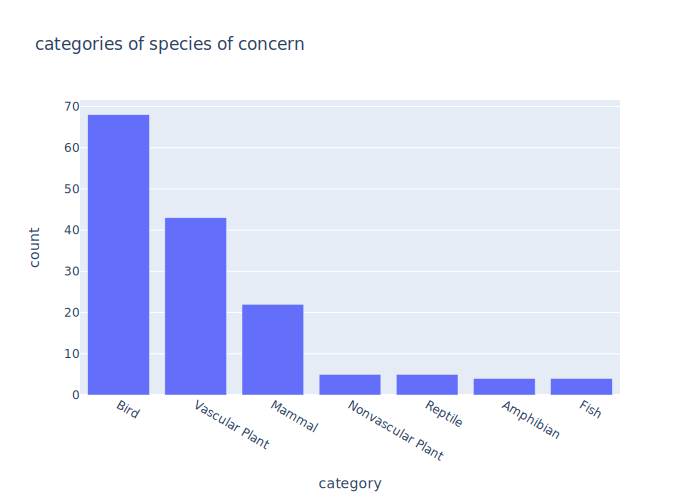

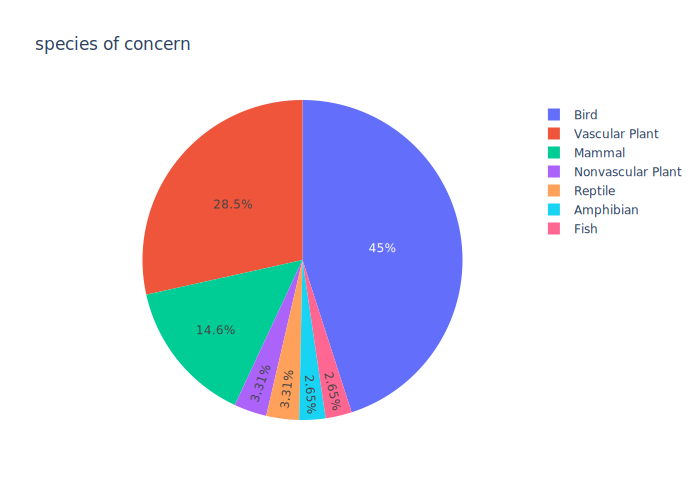

In [25]:
#species.head()
concerned = species[species['conservation_status'] == 'Species of Concern']
concerned_grouped = concerned.groupby('category').size().reset_index(name='count')
concerned_grouped_sorted = concerned_grouped.sort_values(by='count', ascending=False)

fig = px.bar(concerned_grouped_sorted, x = 'category' , y = 'count', title="categories of species of concern")
fig.show(renderer="svg")

fig2 = px.pie(concerned_grouped_sorted, values='count', names='category', title='species of concern')
fig2.show(renderer="svg")

## Species of Concern
- are Visualized in each National Park
- obvious from the visualizations, Birds and vascular plants are species of concern in all national parks

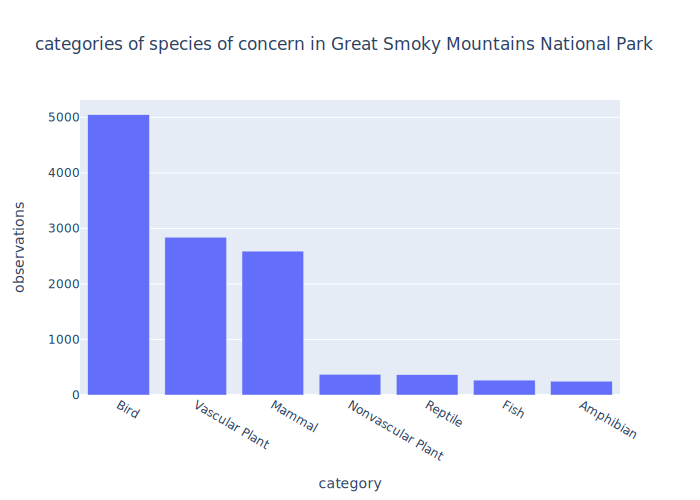

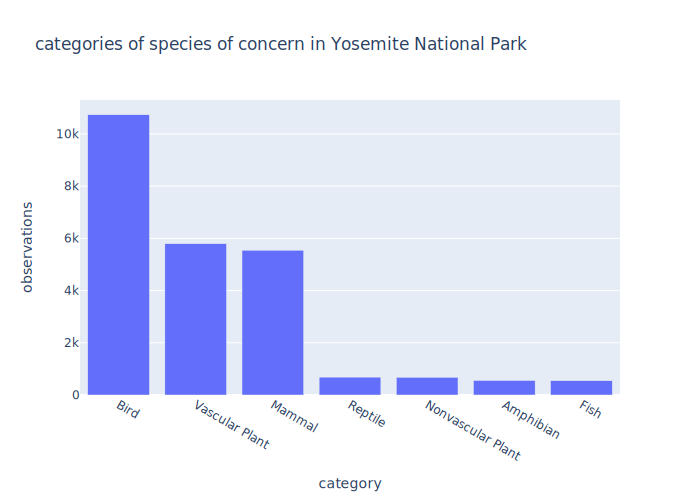

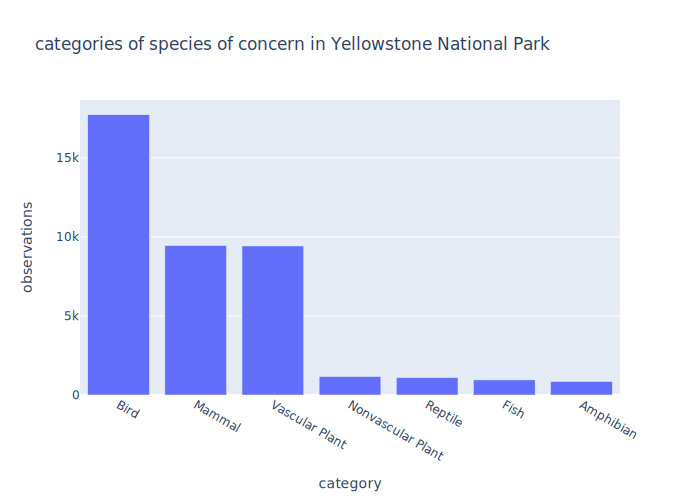

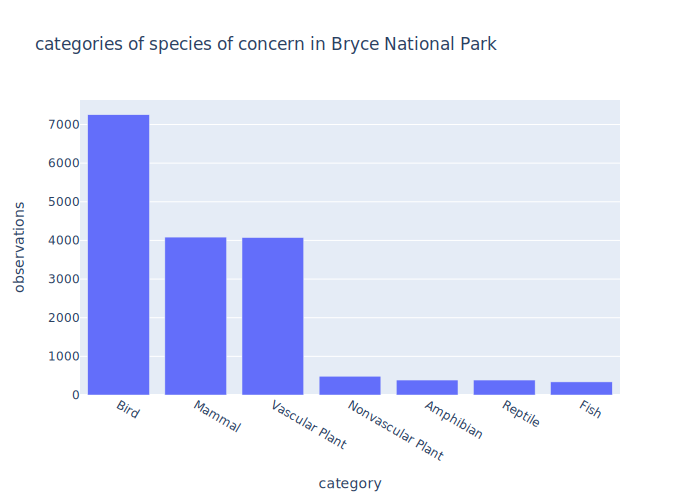

In [37]:
merged_species_smoky = merged_species.loc[merged_species['park_name'] == 'Great Smoky Mountains National Park']
merged_species_smoky_concerned = merged_species_smoky.loc[(merged_species['conservation_status'] == 'Species of Concern')]
merged_species_smoky_concerned_grouped = merged_species_smoky_concerned.groupby('category')['observations']\
    .sum().reset_index()\
    .sort_values(by='observations',ascending=False)
fig1 = px.bar(merged_species_smoky_concerned_grouped, x = 'category' , y = 'observations', title="categories of species of concern in Great Smoky Mountains National Park")
fig1.show(renderer="svg")

merged_species_Yosemite = merged_species.loc[merged_species['park_name'] == 'Yosemite National Park']
merged_species_Yosemite_concerned = merged_species_Yosemite.loc[(merged_species['conservation_status'] == 'Species of Concern')]
merged_species_Yosemite_concerned_grouped = merged_species_Yosemite_concerned.groupby('category')['observations']\
    .sum().reset_index('category')\
    .sort_values(by='observations',ascending=False)
fig2 = px.bar(merged_species_Yosemite_concerned_grouped, x = 'category' , y = 'observations', title="categories of species of concern in Yosemite National Park")
fig2.show(renderer="svg")

merged_species_Yellowstone = merged_species.loc[merged_species['park_name'] == 'Yellowstone National Park']
merged_species_Yellowstone_concerned = merged_species_Yellowstone.loc[(merged_species['conservation_status'] == 'Species of Concern')]
merged_species_Yellowstone_concerned_grouped = merged_species_Yellowstone_concerned.groupby('category')['observations']\
    .sum().reset_index('category')\
    .sort_values(by='observations',ascending=False)
fig3 = px.bar(merged_species_Yellowstone_concerned_grouped, x = 'category' , y = 'observations', title="categories of species of concern in Yellowstone National Park")
fig3.show(renderer="svg")

merged_species_Bryce = merged_species.loc[merged_species['park_name'] == 'Bryce National Park']
merged_species_Bryce_concerned = merged_species_Bryce.loc[(merged_species['conservation_status'] == 'Species of Concern')]
merged_species_Bryce_concerned_grouped = merged_species_Bryce_concerned.groupby('category')['observations']\
    .sum().reset_index('category')\
    .sort_values(by='observations',ascending=False)
fig4 = px.bar(merged_species_Bryce_concerned_grouped, x = 'category' , y = 'observations', title="categories of species of concern in Bryce National Park")
fig4.show(renderer="svg")